In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


modules_route = str(os.getcwd()).replace("\\", "/")+"/Modules/"
sys.path.insert(0, modules_route)

import WavePlotter as wp


In [8]:
plotters = os.listdir(os.getcwd()+'/Data/plotdata')
plotters

['airborne.txt',
 'air_conditioner.txt',
 'alarm.txt',
 'bells.txt',
 'bird.txt',
 'braking.txt',
 'bus_idling.txt',
 'bus_moving.txt',
 'car_idling.txt',
 'crowd.txt',
 'cutting.txt',
 'drilling.txt',
 'explosives.txt',
 'fireworks.txt',
 'horn.txt',
 'impact.txt',
 'motorcycle_idling.txt',
 'motorcycle_moving.txt',
 'music.txt',
 'shouting.txt',
 'siren.txt',
 'steps.txt',
 'talk.txt',
 'water.txt']

In [9]:
datas = []
for t in plotters:
    with open(os.getcwd()+'/Data/plotdata/' + t, "rb") as f:
        datas.append(pickle.load(f))

df = pd.DataFrame(columns = ['station', 'X [frequency]', 'Y [psd]', 'label' ])

for i in range(len(datas)):
    df = df.append(datas[i])
    
df = df.reset_index()

for i in range(len(df)):
    
    if (df.at[i, 'station'] == 'vit_global'):
        
        df.at[i, 'Y [psd]'] = np.mean(df.at[i, 'Y [psd]'], axis = 1)
        
    df.at[i, 'Y [psd]'] = df.at[i, 'Y [psd]'].flatten()
    
df

,index,station,X [frequency],Y [psd],label
0,0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-30.510592, -26.386011, -26.29007, -26.47629,...",airborne
1,1,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-34.239758, -25.954147, -22.232414, -22.25546...",airborne
2,2,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-38.910637, -34.479397, -32.158936, -30.31726...",airborne
3,3,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-35.488373, -38.43441, -47.148575, -42.87484,...",airborne
4,4,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-25.64884, -19.783684, -17.31609, -16.476799,...",airborne
...,...,...,...,...,...
124,5,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-23.383844, -16.25587, -12.790388, -12.910527...",talk
125,6,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-14.588615, -9.436196, -12.369392, -15.555002...",talk
126,0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-28.909582, -23.986877, -23.221636, -22.89333...",water
127,1,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.006374, -38.306538, -32.15228, -31.067917...",water


In [16]:
df.loc[df['label'] == 'horn']

,index,station,X [frequency],Y [psd],label
61,0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-29.42181, -23.592318, -21.550617, -20.460072...",horn
62,1,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-65.820145, -56.892017, -44.632317, -39.32468...",horn
63,2,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.175087, -36.075935, -39.28438, -37.072865...",horn
64,3,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-35.792595, -34.728405, -35.306637, -31.57204...",horn
65,4,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.516827, -32.86572, -30.312248, -28.003166...",horn
66,5,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-32.114723, -26.927883, -22.956472, -20.27525...",horn
67,6,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-19.219414, -9.843602, -11.472109, -14.320692...",horn


In [10]:
df['label'].unique()

array(['airborne', 'air_conditioner', 'braking', 'bells', 'bird',
       'bus_idling', 'bus_moving', 'car_idling', 'crowd', 'cutting',
       'drilling', 'explosives', 'fireworks', 'horn', 'impact',
       'motorcycle_idling', 'motorcycle_moving', 'music', 'shouting',
       'siren', 'steps', 'talk', 'water'], dtype=object)

In [18]:
df['station'].unique()

array(['capta_002', 'campus_miraflores', 'capta_004', 'capta_003', 'mma',
       'control_acustico', 'vit_global'], dtype=object)

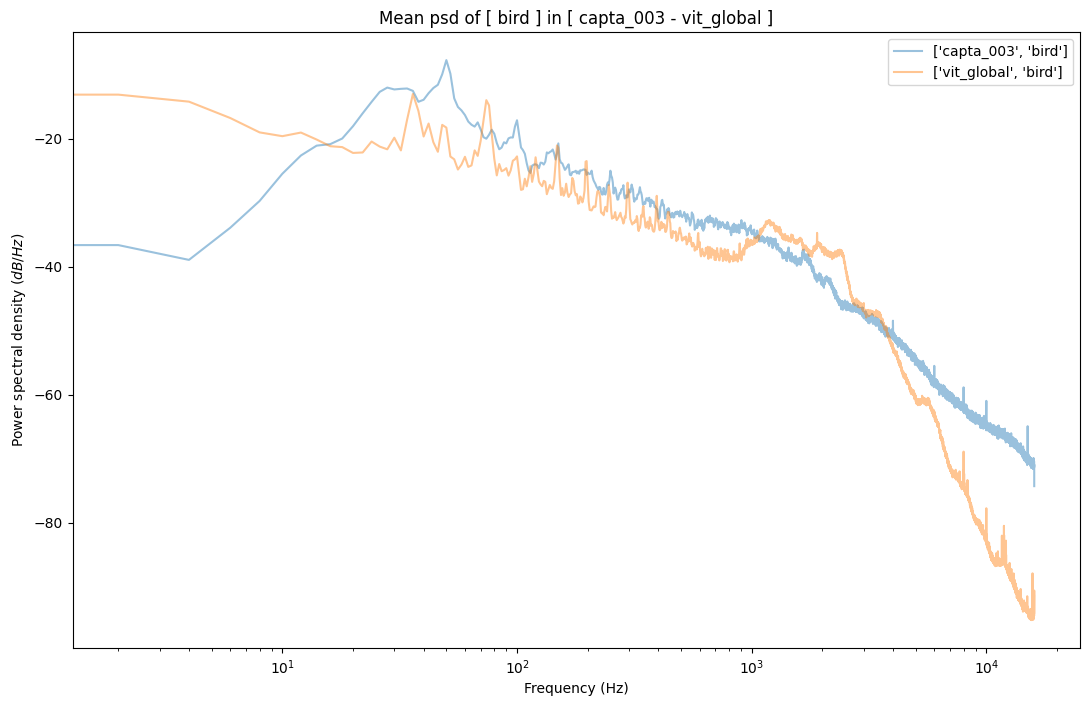

In [11]:
wp.PSD_plot(df, station = ['capta_003', 'vit_global'], label = ['bird'])

In [3]:
a_plot = wp.WavePlot()

Selection: Z:/Proyectos/fusa-training/Data/Threshold_05/bird.txt


In [5]:
colormap = {'capta_002' : 'sienna',
            'capta_003' : 'g', 
            'capta_004' : 'r', 
            'campus_miraflores' : 'c', 
            'mma' : 'y',
            'control_acustico' : 'navy', 
            'vit_global' : 'olive'}

Working at: Z:/Proyectos/fusa-training/Audios/bird
ERUIDO2022_20211220211628_bird_36632.wav
2801 / 2801


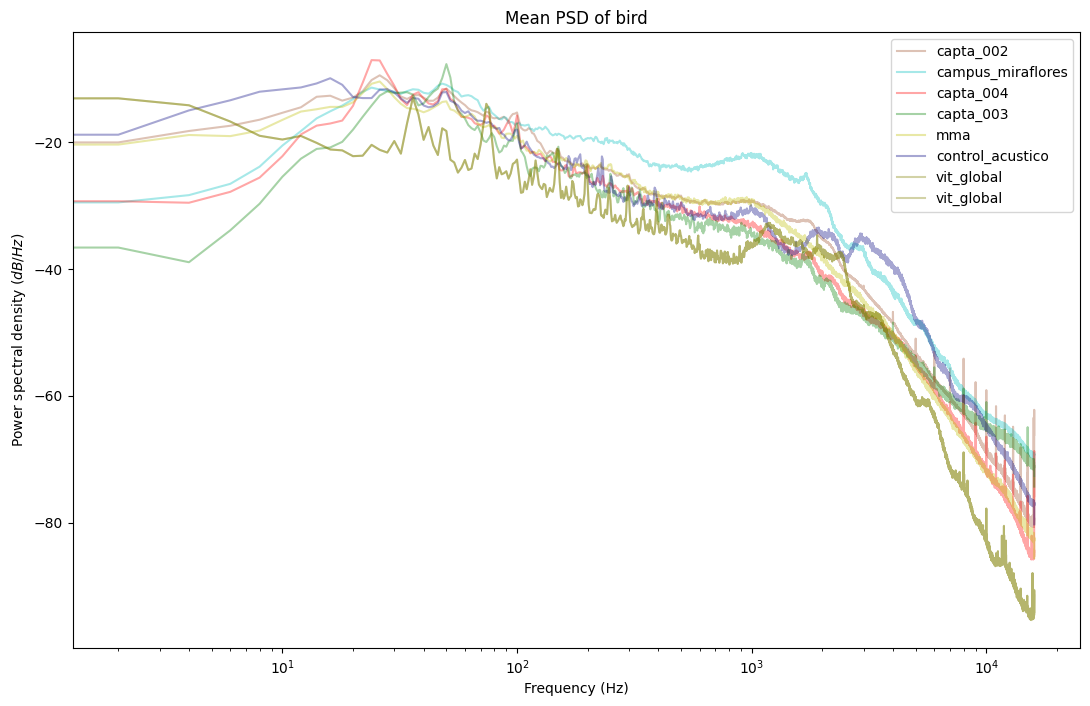

In [6]:
# # fig, ax = plt.subplots()
# # ax1 = bells.Mean_Power_Spectral_Density(color = colormap)

a_plot.Mean_Power_Spectral_Density(color = colormap)

In [7]:
with open(os.getcwd()+'/Data/plotdata/bird.txt', "wb") as f:
    pickle.dump(a_plot.plotdata, f)